In [1]:
%matplotlib inline

import numpy as np
import os
import sys
import re
import matplotlib.pyplot as plt
from skimage import measure
import itertools
import networkx as nx
from scipy.special import comb
sys.path.append("/Users/yves/Documents/Code/structural_knowledge/action_generalisation/")

#import seaborn
#seaborn.set(font_scale=1.5,style='ticks')
import torch as tf

In [2]:
#generate hypercube

def graph_cart_product(A,B=None):
    if B is None: B=A.copy()
    
    n,m = A.shape[0],B.shape[0]
    return np.kron(A,np.eye(m)) + np.kron(np.eye(n),B)

In [3]:
def graph_corona(A,B):
    """ https://www.sciencedirect.com/science/article/pii/S0024379511001182"""

    m,n = A.shape[0], B.shape[0]
    tmp1 = np.hstack([A,np.kron(np.ones([1,n]),np.eye(m))])
    tmp2 = np.hstack([np.kron(np.ones([1,n]).T,np.eye(m)),np.kron(B,np.eye(m))])
    A_corona = np.vstack([tmp1,tmp2])
    return A_corona

In [4]:
#generate hypercube

def strong_product(A,B=None):
    if B is None: B=A.copy()
    
    n,m = A.shape[0],B.shape[0]
    return np.kron(A+ np.eye(n),np.eye(m)+B) - np.eye(n+m)

In [5]:
def eig_sort(M):
    eigenval,v = np.linalg.eig(M)
    v = v[:,np.argsort((eigenval))[::-1]]
    eigenval = eigenval[np.argsort((eigenval))[::-1]]
    return eigenval,v

In [6]:
#cartesian product of two path graphs
def gen_path_graph(n):
    edges = [[i,i+1] for i in range(n-1)]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L


def gen_path_plus(n):
    edges = [[i,i+1] for i in range(n-1)]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    #edges = np.concatenate([edges,[[n-1,3],[3,n-1]]])
    edges = np.concatenate([edges,[[2,4],[4,2]]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L

def gen_cycle_graph(n):
    edges = [[i,(i+1)%(n)] for i in range(n)]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L

def gen_star_graph():
    return None
def gen_tree_graph(depth=3,max_b=3):
    
    edges = []
    ctr = 0
    for d in depth:
        n_branch = np.random.randint(0,max_b)
        
    
def simple_tree(n=8):
    edges = [[0,1],[1,2],[1,3],[2,4],[2,5],[3,6],[3,7]]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L

def gen_star_graph(n=0):
    n=5
    edges = [[0,1],[0,2],[0,3],[0,4]]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L

def gen_random_graph(gtype='ER',n=5,m=4,p=.3):
    if gtype=='ER':
        g = nx.random_graphs.erdos_renyi_graph(n,.7)
    elif gtype=='BB':
        g = nx.generators.barbell_graph(n,2)
    elif gtype=='FC':
        g = nx.complete_graph(n)
    elif gtype=='EMPTY':
        g = nx.empty_graph(n=n)
        g.add_edges_from([[1,0],[0,1],[4,5],[5,4]])
    elif gtype=='gnm':
        done = False
        while not done:
            g = nx.random_graphs.gnm_random_graph(5,4)
            done = nx.is_connected(g)
            
    elif gtype=='WS':
        g = nx.connected_watts_strogatz_graph(n,m,p=.3)
    elif gtype=='ROOM':
        g = nx.grid_2d_graph(n,m)
        
    elif gtype=='BI':
        done = False
        while not done:

            g = nx.bipartite.random_graph(n,m,p)
            done = nx.is_connected(g)

    A = nx.to_numpy_matrix(g)
    n = A.shape[0]
    D = np.eye(n)*A.sum(axis=1)
    L = D - A

    return A,D,L


def gen_outerplanar():
    """ Outerplanar graphs multiplied by path graphs yield planar graphs"""
    n = 8
    edges = [[0,1],[1,2],[2,3],[2,0],[3,4],[3,0],[4,5],[5,6],[5,3],[6,7],[6,3],[7,3],[7,0]]
    edges = np.concatenate([edges,[np.flipud(i) for i in edges]])
    A = np.zeros([n,n])
    D = np.eye(n)
    for e in edges:
        A[e[0],e[1]] = 1
    D = np.eye(n)*A.sum(axis=1)
    L = D - A
    return A,D,L

In [73]:
g = nx.complete_graph(5)

In [7]:
A,D,L = gen_random_graph('EMPTY',n=4)
A2,D2,L2 = gen_star_graph()


In [8]:
n = 5
(n*2**(2*comb(int(n/2),2)))/(2**(comb(n,2)))

0.01953125

In [59]:
#A,D,L = gen_random_graph("ROOM",5,3)

#A,D,L = gen_path_plus(7)
A,D,L = gen_path_graph(5)
A2,D2,L2 = gen_random_graph("ROOM",4,4)
#A2,D2,L2 = gen_cycle_graph(n=4)
#A2,D2,L2 = gen_outerplanar()
#A2,D2,L2 = gen_star_graph()
#A2,D2,L2 = gen_random_graph("BI",5,2)
#A2,D2,L2 = gen_path_graph(7)


In [60]:
A

array([[0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [61]:
A_prod = np.kron(A,A2)#graph_cart_product(A,A2)
A_prod = graph_cart_product(A,A2)
A_prod = graph_corona(A,A2)
D_prod = np.eye(A_prod.shape[0])*A_prod.sum(axis=1)
L_prod = D_prod - A_prod

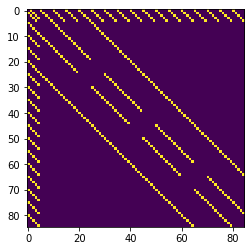

In [62]:
plt.imshow(A_prod,interpolation='None')

In [63]:
evalvs1, evecs1 = eig_sort(L)
evalvs2, evecs2 = eig_sort(L2)

In [64]:
evalvs3, evecs3 = eig_sort(L_prod)

In [65]:
evalvs3

array([ 4.00952125e+02+0.00000000e+00j,  4.04336783e+00+0.00000000e+00j,
        3.50454148e+00+0.00000000e+00j,  3.23606798e+00+0.00000000e+00j,
        3.23606798e+00+0.00000000e+00j,  3.23606798e+00+0.00000000e+00j,
        3.23606798e+00+0.00000000e+00j,  3.23606798e+00+0.00000000e+00j,
        2.91336147e+00+0.00000000e+00j,  2.30172574e+00+0.00000000e+00j,
        2.23606798e+00+0.00000000e+00j,  2.23606798e+00+0.00000000e+00j,
        2.23606798e+00+0.00000000e+00j,  2.23606798e+00+0.00000000e+00j,
        2.23606798e+00+0.00000000e+00j,  2.23606798e+00+0.00000000e+00j,
        2.23606798e+00+0.00000000e+00j,  2.23606798e+00+0.00000000e+00j,
        2.23606798e+00+0.00000000e+00j,  2.23606798e+00+0.00000000e+00j,
        2.19232790e+00+0.00000000e+00j,  1.22603316e+00+0.00000000e+00j,
        1.22406391e+00+0.00000000e+00j,  1.21969628e+00+0.00000000e+00j,
        1.21047236e+00+0.00000000e+00j,  1.20079939e+00+0.00000000e+00j,
        1.00000000e+00+1.67640000e-15j,  1.00000000

In [66]:
evalvs1+1

array([4.61803399, 3.61803399, 2.38196601, 1.38196601, 1.        ])

In [67]:
evalvs2+1

array([ 4.58363336e+01+0.0000000e+00j,  4.23606798e+00+0.0000000e+00j,
        3.23606798e+00+0.0000000e+00j,  3.23606798e+00+0.0000000e+00j,
        2.24153017e+00+0.0000000e+00j,  2.00000000e+00+0.0000000e+00j,
        2.00000000e+00+0.0000000e+00j,  1.00000000e+00+0.0000000e+00j,
        1.00000000e+00+0.0000000e+00j,  1.00000000e+00+1.4316306e-16j,
        1.00000000e+00-1.4316306e-16j, -4.44089210e-16+0.0000000e+00j,
       -7.78637878e-02+0.0000000e+00j, -2.36067977e-01+0.0000000e+00j,
       -1.23606798e+00+0.0000000e+00j, -1.23606798e+00+0.0000000e+00j])

In [68]:
e1,V1 = eig_sort(L)
e2,V2 = eig_sort(L2)
ep,Vp = eig_sort(L_prod)

In [69]:
min_pos_eval = np.argmin(np.abs(e2))

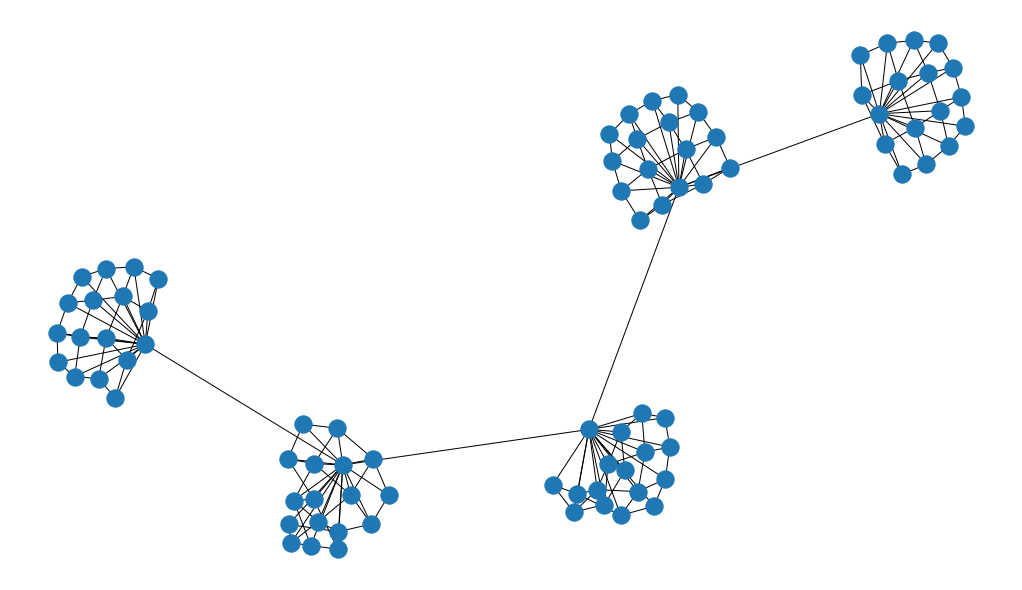

In [71]:
plt.figure(figsize=(14,8))
g = nx.from_numpy_matrix(A_prod)
try:
    #plt.subplot(1,2,1)
    nx.draw_planar(g)
    #plt.subplot(1,2,2)
    #nx.draw_spring(g)
    print('planar')
except:
    nx.draw_spring(g)

In [156]:
np.array(g.degree)[:,1].max()

6

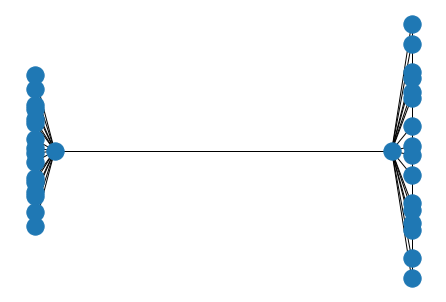

In [33]:
nx.draw_kamada_kawai(g)

In [158]:
nx.is_connected(g)

True

In [159]:
g = nx.from_numpy_array(A2)

IndexError: tuple index out of range

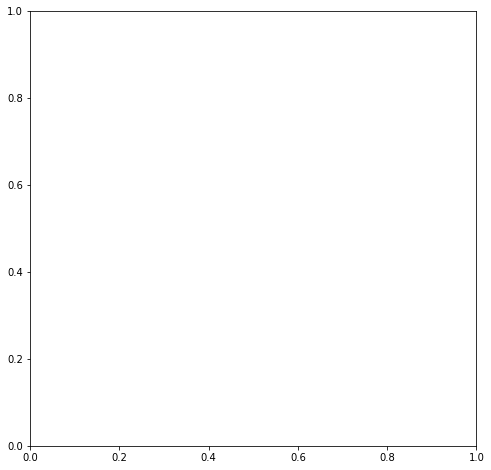

In [160]:
plt.figure(figsize=(8,8))
g = nx.from_numpy_array(A2)
pos = nx.spectral_layout(g)
#for k,v in pos.items():
#    pos[k] = v + np.random.normal(size=2,scale=.1)
nx.draw_networkx_nodes(g,pos,node_color=np.array(V2[:,min_pos_eval].flatten().real)[0],node_size=256,alpha=1)
nx.draw_networkx_edges(g,pos,width=1.0,alpha=0.5)
#seaborn.despine()

ValueError: 'c' argument has 1 elements, which is not acceptable for use with 'x' with size 144, 'y' with size 144.

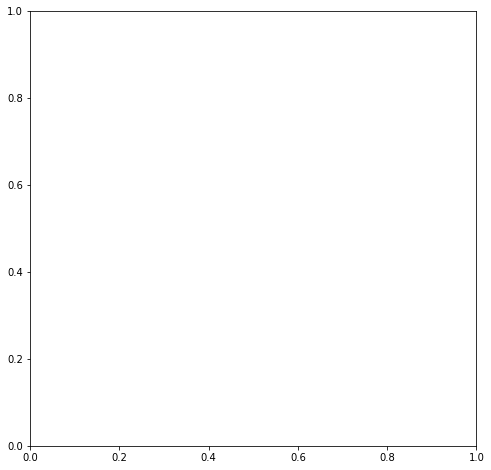

In [1163]:
plt.figure(figsize=(8,8))
pos = nx.spring_layout(g)
#for k,v in pos.items():
#    pos[k] = v + np.random.normal(size=2,scale=.1)
nx.draw_networkx_nodes(g,pos,node_color=np.tile(V1[:,1],[V2.shape[0],1]).flatten(),node_size=256,alpha=.6)
nx.draw_networkx_nodes(g,pos,node_color=np.array(np.tile(V2[:,2],[V1.shape[0],1]).T).flatten(),node_size=64)
nx.draw_networkx_edges(g,pos,width=1.0,alpha=0.5)
#seaborn.despine()

In [259]:
np.tile(V2[:,2],[V1.shape[0],1]).T.flatten()

array([-0.0091837 , -0.0091837 , -0.0091837 , -0.0091837 , -0.0091837 ,
       -0.0091837 , -0.0091837 , -0.5190004 , -0.5190004 , -0.5190004 ,
       -0.5190004 , -0.5190004 , -0.5190004 , -0.5190004 ,  0.24016061,
        0.24016061,  0.24016061,  0.24016061,  0.24016061,  0.24016061,
        0.24016061,  0.41211887,  0.41211887,  0.41211887,  0.41211887,
        0.41211887,  0.41211887,  0.41211887, -0.42357077, -0.42357077,
       -0.42357077, -0.42357077, -0.42357077, -0.42357077, -0.42357077,
       -0.22361215, -0.22361215, -0.22361215, -0.22361215, -0.22361215,
       -0.22361215, -0.22361215,  0.52308753,  0.52308753,  0.52308753,
        0.52308753,  0.52308753,  0.52308753,  0.52308753])

In [260]:
len(np.tile(V2[:,2],[V1.shape[0],1]).T.flatten())

49

In [261]:
ev_sums = []
for e1_ in e1:
    for e2_ in e2:
        ev_sums.append(e1_ + e2_)
ev_sums = np.array(ev_sums)

In [262]:
ev_sums

array([ 8.26244261e+00,  8.26244261e+00,  6.90554674e+00,  6.90554674e+00,
        5.21352527e+00,  5.21352527e+00,  4.46050487e+00,  7.60387547e+00,
        7.60387547e+00,  6.24697960e+00,  6.24697960e+00,  4.55495813e+00,
        4.55495813e+00,  3.80193774e+00,  6.24697960e+00,  6.24697960e+00,
        4.89008374e+00,  4.89008374e+00,  3.19806226e+00,  3.19806226e+00,
        2.44504187e+00,  6.04106101e+00,  6.04106101e+00,  4.68416515e+00,
        4.68416515e+00,  2.99214367e+00,  2.99214367e+00,  2.23912328e+00,
        4.55495813e+00,  4.55495813e+00,  3.19806226e+00,  3.19806226e+00,
        1.50604079e+00,  1.50604079e+00,  7.53020396e-01,  4.10230959e+00,
        4.10230959e+00,  2.74541372e+00,  2.74541372e+00,  1.05339225e+00,
        1.05339225e+00,  3.00371852e-01,  3.80193774e+00,  3.80193774e+00,
        2.44504187e+00,  2.44504187e+00,  7.53020396e-01,  7.53020396e-01,
       -5.55111512e-17])

In [263]:
ep

array([ 8.26244261e+00,  8.26244261e+00,  7.60387547e+00,  7.60387547e+00,
        6.90554674e+00,  6.90554674e+00,  6.24697960e+00,  6.24697960e+00,
        6.24697960e+00,  6.24697960e+00,  6.04106101e+00,  6.04106101e+00,
        5.21352527e+00,  5.21352527e+00,  4.89008374e+00,  4.89008374e+00,
        4.68416515e+00,  4.68416515e+00,  4.55495813e+00,  4.55495813e+00,
        4.55495813e+00,  4.55495813e+00,  4.46050487e+00,  4.10230959e+00,
        4.10230959e+00,  3.80193774e+00,  3.80193774e+00,  3.80193774e+00,
        3.19806226e+00,  3.19806226e+00,  3.19806226e+00,  3.19806226e+00,
        2.99214367e+00,  2.99214367e+00,  2.74541372e+00,  2.74541372e+00,
        2.44504187e+00,  2.44504187e+00,  2.44504187e+00,  2.23912328e+00,
        1.50604079e+00,  1.50604079e+00,  1.05339225e+00,  1.05339225e+00,
        7.53020396e-01,  7.53020396e-01,  7.53020396e-01,  3.00371852e-01,
       -4.99600361e-16])

In [118]:
yy = np.sin(np.linspace(0,8*2*np.pi,num=200))

# Nice grid cell plot 

In [211]:

#A,D,L = gen_path_graph(n=64)
A,D,L = gen_random_graph("ROOM",4,3)
A2,D2,L2 = gen_path_graph(n=6)
#A2,D2,L2 = gen_random_graph("BI",3,3)

In [129]:
A_prod = np.kron(A,A2)
A_prod = graph_cart_product(A,A2)
D_prod = np.eye(A_prod.shape[0])*A_prod.sum(axis=1)
L_prod = D_prod - A_prod

In [130]:
g = nx.from_numpy_matrix(A)


In [131]:
e1,V1 = eig_sort(L)
e2,V2 = eig_sort(L2)
ep,Vp = eig_sort(L_prod)

ValueError: 'c' argument has 25 elements, which is not acceptable for use with 'x' with size 5, 'y' with size 5.

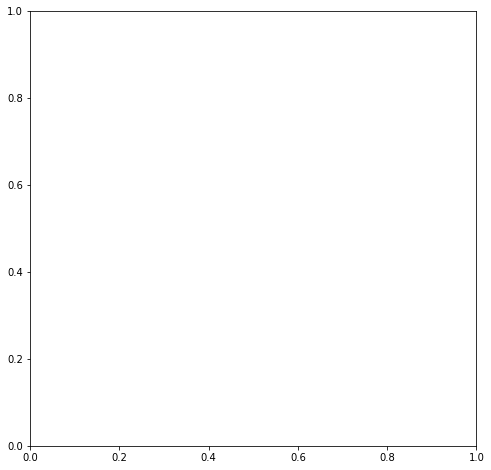

In [132]:
plt.figure(figsize=(8,8))
pos = nx.spring_layout(g)
#for k,v in pos.items():
#    pos[k] = v + np.random.normal(size=2,scale=.1)
nx.draw_networkx_nodes(g,pos,node_color=np.tile(V1[:,1],[V2.shape[0],1]).flatten(),node_size=256,alpha=.6)
nx.draw_networkx_nodes(g,pos,node_color=np.array(np.tile(V2[:,2],[V1.shape[0],1]).T).flatten(),node_size=64)
nx.draw_networkx_edges(g,pos,width=1.0,alpha=0.5)


ValueError: 'c' argument has 25 elements, which is not acceptable for use with 'x' with size 5, 'y' with size 5.

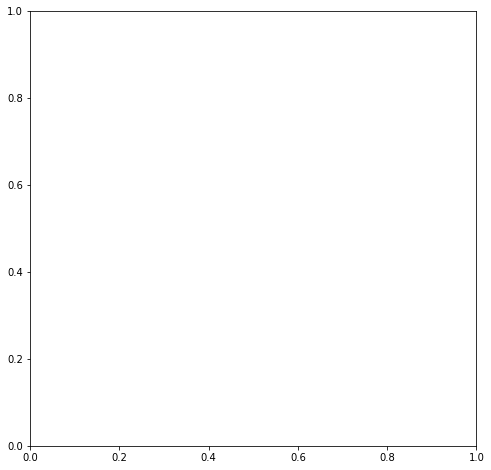

In [133]:
plt.figure(figsize=(8,8))
pos = nx.spring_layout(g)
#for k,v in pos.items():
#    pos[k] = v + np.random.normal(size=2,scale=.1)
nx.draw_networkx_nodes(g,pos,node_color=np.tile(V1[:,1],[V2.shape[0],1]).flatten(),node_size=256,alpha=.6)
nx.draw_networkx_nodes(g,pos,node_color=np.array(np.tile(V2[:,2],[V1.shape[0],1]).T).flatten(),node_size=64)
nx.draw_networkx_edges(g,pos,width=1.0,alpha=0.5)
#seaborn.despine()

In [210]:
A.shape

(9, 9)

In [ ]:
pos = nx.layout.spectral_layout(g)



In [ ]:
pos = np.vstack(pos.values())

In [ ]:
pos.shape

In [1002]:
Vp.shape

(576, 576)

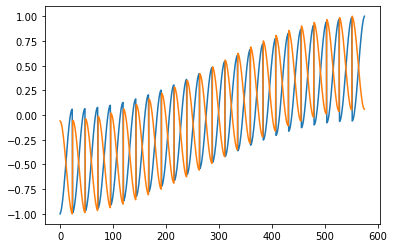

In [1049]:
plt.plot(pos[:,0])
plt.plot(pos[:,1])
#plt.xlim(-1,100)

In [1031]:
pos[0]

array([-1.        , -0.05955093])

In [1019]:
np.tile(np.linspace(0,1,num=24),24).shape

(576,)

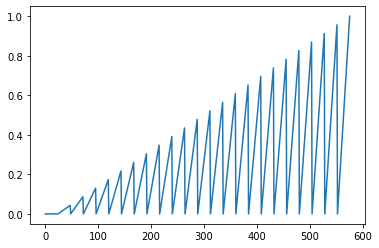

In [1054]:
plt.plot(np.outer(np.linspace(0,1,num=24),np.linspace(0,1,num=24)).flatten())

(-1, 100)

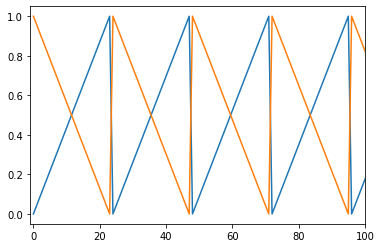

In [1027]:
plt.plot(np.tile(np.linspace(0,1,num=24),24))
plt.plot(np.tile(np.linspace(1,0,num=24),24))
plt.xlim(-1,100)

In [1029]:
xx,yy = np.meshgrid(np.tile(np.linspace(0,1,num=24),24),np.tile(np.linspace(0,1,num=24),24))

In [1043]:
pos2 = np.array([np.tile(np.linspace(0,1,num=24),24),np.tile(np.linspace(1,0,num=24),24)]).T

In [1057]:
pos2 = np.array([np.outer(np.linspace(0,1,num=24),np.linspace(0,1,num=24)).flatten(),
                np.outer(np.linspace(1,0,num=24),np.linspace(0,1,num=24)).flatten()]).T

In [1059]:
pos.shape

(576, 2)

In [1070]:
pos = np.vstack([np.tile(np.linspace(0,1,24),24),np.repeat(np.linspace(0,1,24),24)]).T

In [1071]:
pos.shape

(576, 2)

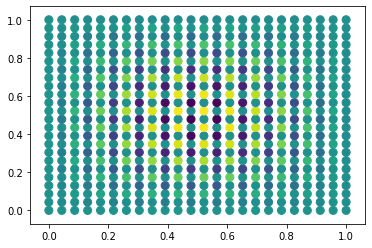

In [1073]:
plt.scatter(pos[:,0],pos[:,1],c=Vp[:,0],alpha=1.,s=64)

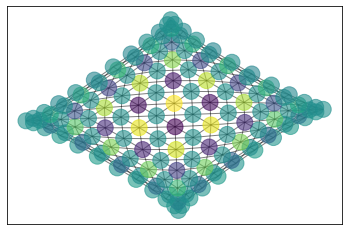

In [949]:
pos = nx.layout.spectral_layout(g)
nx.draw_networkx_nodes(g,pos,node_color=Vp[:,1],node_size=256,alpha=.6)
nx.draw_networkx_edges(g,pos,width=1.0,alpha=0.5)


In [122]:
g = nx.generators.classic.circulant_graph(12,[0,0,5])


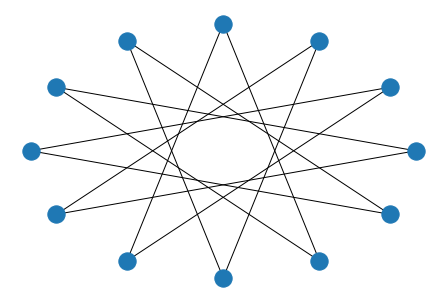

In [125]:
nx.draw_kamada_kawai(g)

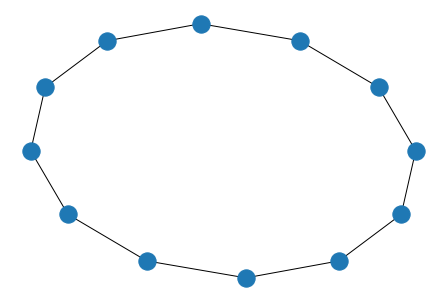

In [124]:
nx.draw_spectral(g)

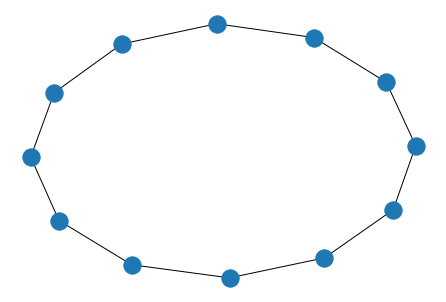

In [126]:
nx.draw(g)